In [1]:
import sys
sys.path.append('./TextDetection')
from detection import Detection
from TextDetection.concern.config import Configurable, Config

exp = "./TextDetection/experiments/seg_detector/td500_resnet18_deform_thre.yaml"
img_path = './TextDetection/datasets/total_text/test_images/IMG_1668.JPG'
resume = './TextDetection/weights/td500_resnet18'
box_thresh = 0.7

args = {
    'exp': exp,
    'img_path': img_path,
    'resume': resume,
    'box_thresh': box_thresh,
    'result_dir': '../demo/',
    'image_short_side': 736,
    'polygon': True,
    'visualize': True
}

conf = Config()
experiment_args = conf.compile(conf.load(exp))['Experiment']
experiment_args.update(cmd=args)
experiment = Configurable.construct_class_from_config(experiment_args)

demo = Detection(experiment, experiment_args, cmd=args)
contours = demo.inference(args['img_path'])

verbose: True
Initializing log dir for workspace/SegDetectorModel-seg_detector/deformable_resnet18/L1BalanceCELoss
./TextDetection/datasets/TD_TR/TD500/
Resuming from ./TextDetection/weights/td500_resnet18
Resumed from ./TextDetection/weights/td500_resnet18


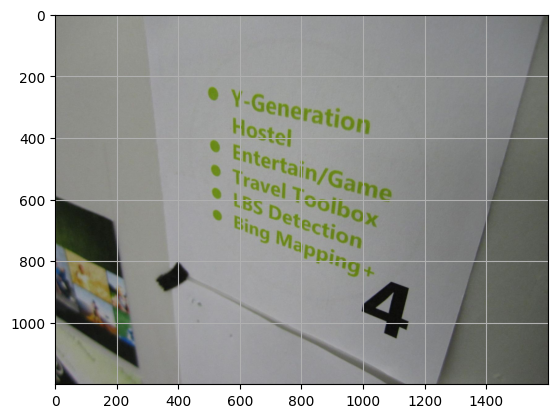

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open(img_path)
plt.imshow(image, cmap='gray')
plt.grid(True)

In [3]:
from postprocess import PostProcess

image = np.array(image)
post = PostProcess()
imgs = post(image, contours, unclip_ratio=0.5)

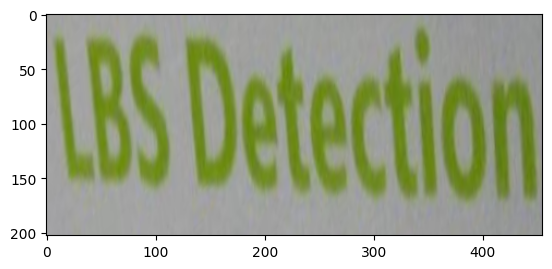

In [7]:
plt.imshow(imgs[2])